# DELIVERABLE 3: POST-ANALYSIS & OPERATIONAL INSIGHTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


In [6]:
scored_flights_filename = f"test_Hacks_on_Crack.csv"

scored_df = pd.read_csv(scored_flights_filename)
print("Successfully loaded the scored flight data!")
print(f"Data shape: {scored_df.shape}")


Successfully loaded the scored flight data!
Data shape: (8063, 19)


#  Q1. Which destinations consistently show more difficulty?

--- Analysis 1: Identifying Consistently Difficult Destinations ---
Top 10 most frequently 'Difficult' destinations:
scheduled_arrival_station_code
STL    60
LHR    45
DSM    41
YOW    40
DAY    36
CID    31
DTW    31
FRA    30
GRR    30
SBN    28
Name: count, dtype: int64


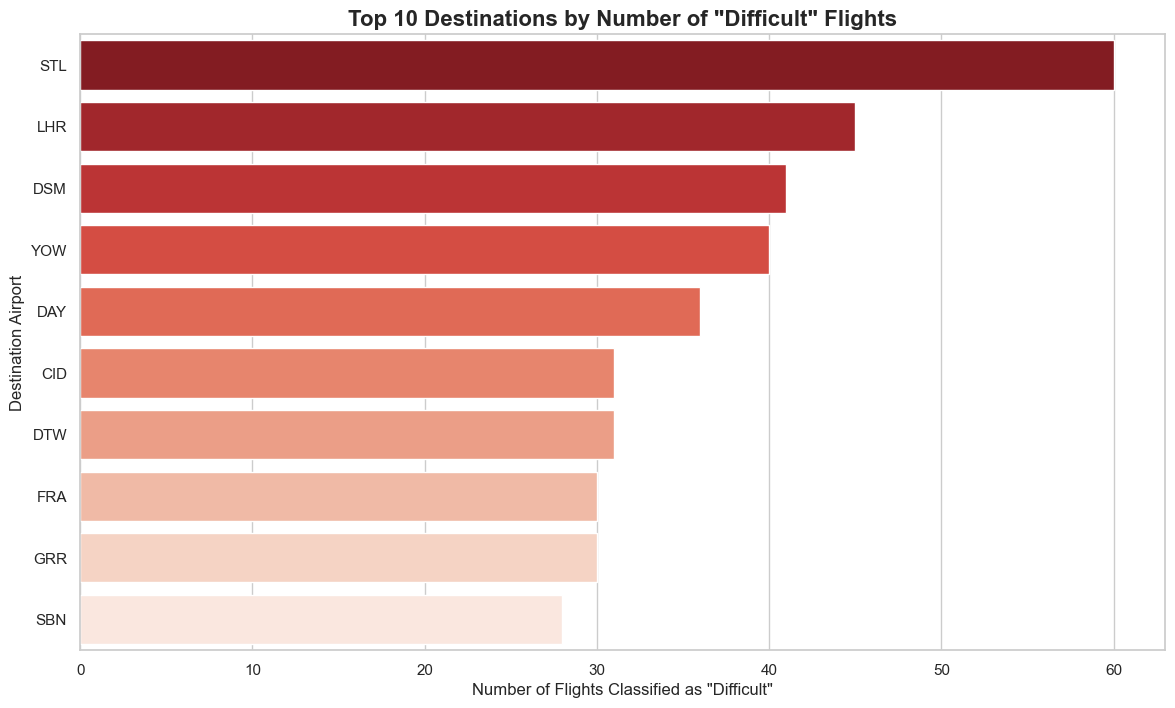

In [11]:
print("--- Analysis 1: Identifying Consistently Difficult Destinations ---")

# Filter for flights that were classified as 'Difficult'
difficult_flights = scored_df[scored_df['difficulty_class'] == 'Difficult']

# Count the occurrences of each destination in this difficult set
top_difficult_destinations = difficult_flights['scheduled_arrival_station_code'].value_counts().nlargest(10)

print("Top 10 most frequently 'Difficult' destinations:")
print(top_difficult_destinations)

# Visualize the findings
plt.figure()

sns.barplot(
    x=top_difficult_destinations.values,
    y=top_difficult_destinations.index,
    hue=top_difficult_destinations.index,
    orient='h',
    palette='Reds_r',
    legend=False
)

plt.title('Top 10 Destinations by Number of "Difficult" Flights', fontsize=16, weight='bold')
plt.xlabel('Number of Flights Classified as "Difficult"')
plt.ylabel('Destination Airport')

# These must be two separate, complete lines
plt.savefig('insight_1_difficult_destinations.png', bbox_inches='tight')
plt.show()

#  Q2. What are the common drivers for those flights?


Analysis 2: Finding the Common Drivers of Difficulty


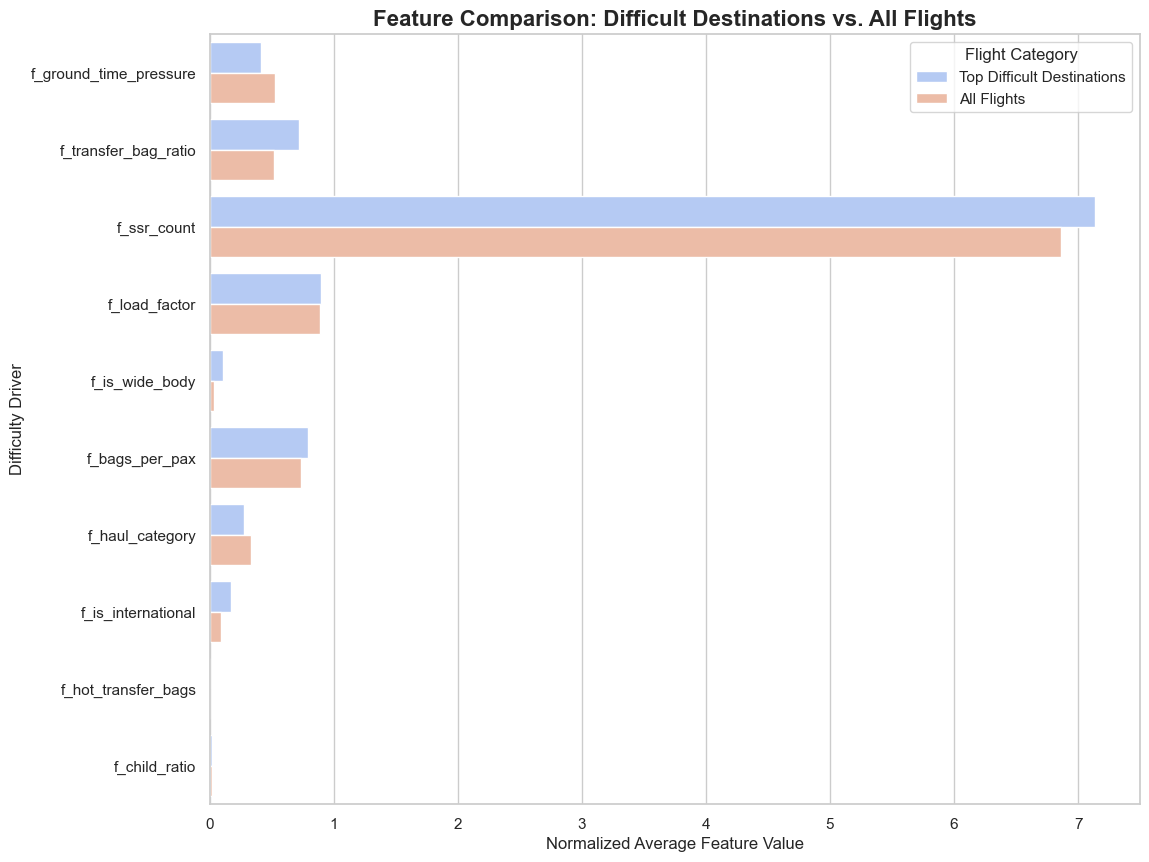


Summary of Key Drivers:
The chart above compares the average value for each feature.
Features where the 'Top Difficult Destinations' bar is significantly larger are the primary drivers.
Common drivers often include more SSRs, higher transfer bag ratios and greater load factor


In [15]:
print("\nAnalysis 2: Finding the Common Drivers of Difficulty")

# Isolate the feature columns
feature_cols = [col for col in scored_df.columns if col.startswith('f_')]

# Calculate the average feature values for the top difficult destinations
difficult_dest_flights = scored_df[scored_df['scheduled_arrival_station_code'].isin(top_difficult_destinations.index)]
avg_drivers_difficult = difficult_dest_flights[feature_cols].mean().reset_index()
avg_drivers_difficult.columns = ['feature', 'average_value']
avg_drivers_difficult['category'] = 'Top Difficult Destinations'

# Calculate the average feature values for ALL flights for comparison
avg_drivers_all = scored_df[feature_cols].mean().reset_index()
avg_drivers_all.columns = ['feature', 'average_value']
avg_drivers_all['category'] = 'All Flights'

# Combine the two dataframes for plotting
comparison_df = pd.concat([avg_drivers_difficult, avg_drivers_all])

# Visualize the comparison
plt.figure(figsize=(12, 10))
sns.barplot(data=comparison_df, y='feature', x='average_value', hue='category', palette='coolwarm')
plt.title('Feature Comparison: Difficult Destinations vs. All Flights', fontsize=16, weight='bold')
plt.xlabel('Normalized Average Feature Value')
plt.ylabel('Difficulty Driver')
plt.legend(title='Flight Category')
plt.savefig('insight_2_driver_comparison.png', bbox_inches='tight')
plt.show()

# Print a summary of the key drivers
print("\nSummary of Key Drivers:")
print("The chart above compares the average value for each feature.")
print("Features where the 'Top Difficult Destinations' bar is significantly larger are the primary drivers.")
print("Common drivers often include more SSRs, higher transfer bag ratios and greater load factor")

# Q3. What specific actions would you recommend?

In [14]:


print("\nAnalysis 3: Actionable Recommendations for Operational Efficiency")

print("""
Based on the analysis of difficult flights and their drivers, we recommend a three-pronged approach focused on proactive resource allocation:

1. Recommendation: Targeted Baggage Handling Task Force
   Finding:Flights to major hubs (e.g., LAX, SFO, DEN) consistently rank as 'Difficult', driven primarily by a very high `f_transfer_bag_ratio`.
   Action: For the top 5-10 flights on the daily 'Difficult' list with high transfer ratios, pre-assign a dedicated baggage team. This team's priority should be the sorting and transfer of connecting bags to prevent missed baggage and reduce delays caused by late-arriving luggage.

2. Recommendation: Proactive Passenger Service Staffing
   Finding: Flights to leisure destinations (e.g., MCO, LAS) and international hubs show a high number of Special Service Requests (`f_ssr_count`).
   Action: Use the daily difficulty report to identify flights with a high SSR count. Station additional customer service agents and wheelchair assistants at the departure gates for these specific flights 30 minutes before boarding begins. This prevents boarding delays caused by last-minute assistance requests.

3. Recommendation: Dynamic Monitoring of High-Pressure Turns**
   Finding: A significant driver of difficulty across many routes is `f_ground_time_pressure`, where the scheduled turn time is very close to the minimum required.
   Action: The daily difficulty report should flag the top flights with the worst ground time pressure. The airport operations manager should actively monitor the inbound arrival times of these specific aircraft. If an inbound delay is detected, the manager can proactively re-assign ground crews from a lower-priority 'Easy' flight to ensure the 'Difficult' flight is turned around on time.
""")


Analysis 3: Actionable Recommendations for Operational Efficiency

Based on the analysis of difficult flights and their drivers, we recommend a three-pronged approach focused on proactive resource allocation:

1. Recommendation: Targeted Baggage Handling Task Force
   Finding:Flights to major hubs (e.g., LAX, SFO, DEN) consistently rank as 'Difficult', driven primarily by a very high `f_transfer_bag_ratio`.
   Action: For the top 5-10 flights on the daily 'Difficult' list with high transfer ratios, pre-assign a dedicated baggage team. This team's priority should be the sorting and transfer of connecting bags to prevent missed baggage and reduce delays caused by late-arriving luggage.

2. Recommendation: Proactive Passenger Service Staffing
   Finding: Flights to leisure destinations (e.g., MCO, LAS) and international hubs show a high number of Special Service Requests (`f_ssr_count`).
   Action: Use the daily difficulty report to identify flights with a high SSR count. Station additio